In [1]:
# dapatkan datanya dari
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

# buka zip datanya
!unzip dataset.zip?dl=0

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  i

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Membangun Model Untuk melatih data

In [3]:
# Bekerja dengan model yang sudah terlatih

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# membuat model
model = Model(base_model.input, x)

17235968/17225924 [==============================] - 0s 0us/step


In [4]:
# semua lapisan model

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [5]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Mempersiapkan data menggunakan generator data

In [6]:
# untuk memvariasikan gambar
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

# setting dimana model dapat memperoleh data dengan menggunakan fungsi
train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [7]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


# memvisualisasikan data yang diumpankan untuk melatih gen data

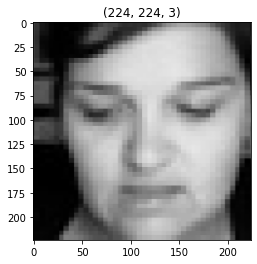

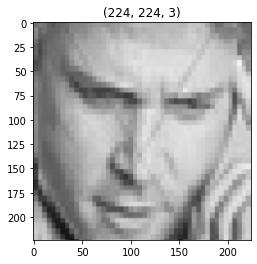

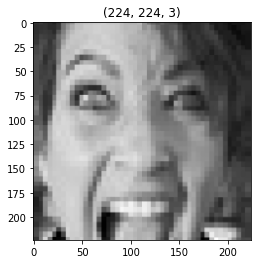

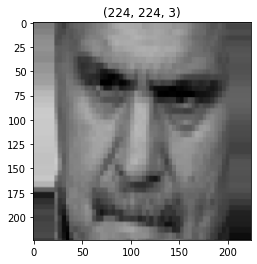

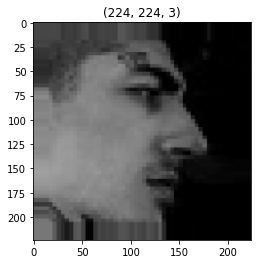

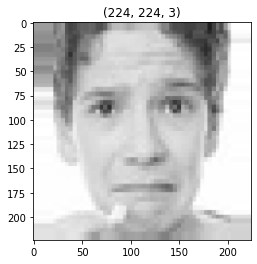

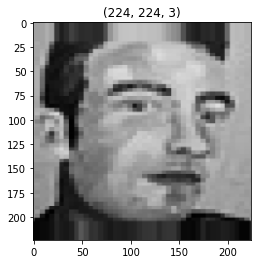

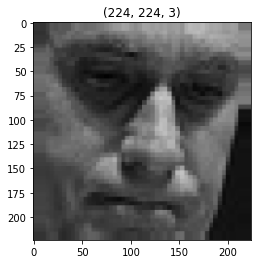

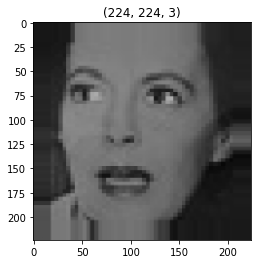

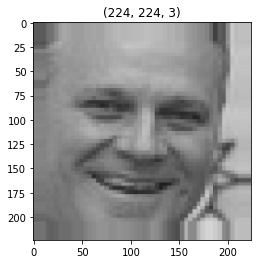

In [8]:
# untuk memvisualisasikan gambar dalam generator data pelatihan

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# fungsi saat dipanggil akan melindungi gambar
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# panggilan fungsi untuk memplot gambar
plotImages(t_img, label)

# memiliki pemberhentian awal dan pos pemeriksaan model

In [9]:
## memiliki pemberhentian awal dan titik pemeriksaan model

from keras.callbacks import ModelCheckpoint, EarlyStopping

# berhenti lebih awal
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# untuk menghasilkan checkpoint
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# menempatkan panggilan kembali dalam daftar
call_back = [es, mc]

In [10]:
# kita akan melakukan proses training
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 23.2511 - accuracy: 0.1969
Epoch 1: val_accuracy improved from -inf to 0.19141, saving model to best_model.h5
10/10 [==============================] - 31s 3s/step - loss: 23.2511 - accuracy: 0.1969 - val_loss: 14.1191 - val_accuracy: 0.1914
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 13.9638 - accuracy: 0.2594
Epoch 2: val_accuracy improved from 0.19141 to 0.28125, saving model to best_model.h5
10/10 [==============================] - 25s 2s/step - loss: 13.9638 - accuracy: 0.2594 - val_loss: 10.6581 - val_accuracy: 0.2812
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 8.5768 - accuracy: 0.3438
Epoch 3: val_accuracy improved from 0.28125 to 0.41406, saving model to best_model.h5
10/10 [==============================] - 25s 3s/step - loss: 8.5768 - accuracy: 0.3438 - val_loss: 6.8858 - val_accuracy: 0.4141
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 6.

In [11]:

# loss adalah training loss. Yaitu nilai dari penghitungan loss function dari training dataset dan prediksi dari modelnya.
# accuracy adalah training accuracy. Yaitu nilai dari penghitungan akurasi dari training dataset dan prediksi dari modelnya.
# validation loss adalah nilai penghitungan loss function dari validation dataset dan prediksi dari modelnya dengan input data dari validation dataset tersebut.
# validation accuracy adalah nilai penghitungan akurasi dari validation dataset dan prediksi dari modelnya dengan input data dari validation dataset tersebut.


# Memuat model yang paling sesuai
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [12]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

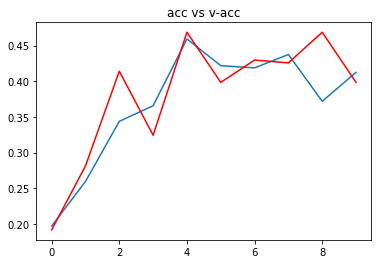

In [13]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

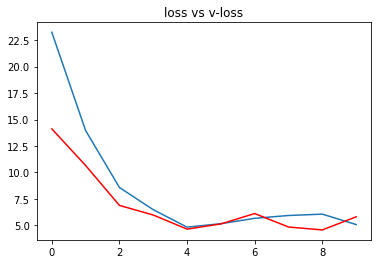

In [14]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [15]:
# hanya untuk memetakan nilai o/p
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

 the image is of neutral


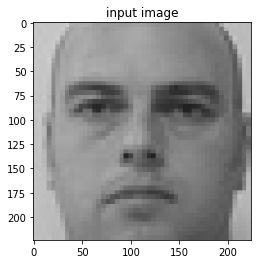

In [16]:
# jalur gambar untuk melihat apakah itu memprediksi kelas yang benar

path = "/content/test/neutral/PrivateTest_11752870.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# untuk menampilkan gambar
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()